In [1]:
import os
import pandas as pd
from google.colab import files
import seaborn as sn
import matplotlib.pyplot as plt
import sklearn
import plotly.express as px
from sklearn.preprocessing import LabelBinarizer
import numpy as np
import scipy.stats as st
import plotly

## Dataframe creation

In [2]:
files.upload()

Saving heart.csv to heart (2).csv


{'heart.csv': b'Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease\n40,M,ATA,140,289,0,Normal,172,N,0,Up,0\n49,F,NAP,160,180,0,Normal,156,N,1,Flat,1\n37,M,ATA,130,283,0,ST,98,N,0,Up,0\n48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1\n54,M,NAP,150,195,0,Normal,122,N,0,Up,0\n39,M,NAP,120,339,0,Normal,170,N,0,Up,0\n45,F,ATA,130,237,0,Normal,170,N,0,Up,0\n54,M,ATA,110,208,0,Normal,142,N,0,Up,0\n37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1\n48,F,ATA,120,284,0,Normal,120,N,0,Up,0\n37,F,NAP,130,211,0,Normal,142,N,0,Up,0\n58,M,ATA,136,164,0,ST,99,Y,2,Flat,1\n39,M,ATA,120,204,0,Normal,145,N,0,Up,0\n49,M,ASY,140,234,0,Normal,140,Y,1,Flat,1\n42,F,NAP,115,211,0,ST,137,N,0,Up,0\n54,F,ATA,120,273,0,Normal,150,N,1.5,Flat,0\n38,M,ASY,110,196,0,Normal,166,N,0,Flat,1\n43,F,ATA,120,201,0,Normal,165,N,0,Up,0\n60,M,ASY,100,248,0,Normal,125,N,1,Flat,1\n36,M,ATA,120,267,0,Normal,160,N,3,Flat,1\n43,F,TA,100,223,0,Normal,142,N,0,Up,0\n44,M,ATA,120,184,0

In [3]:
df = pd.read_csv('heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
numerical= df.drop(['HeartDisease'], axis=1).select_dtypes('number').columns

categorical = df.select_dtypes('object').columns
print(list(numerical))
print(categorical)
print(df)

['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')
     Age Sex ChestPainType  ...  Oldpeak  ST_Slope  HeartDisease
0     40   M           ATA  ...      0.0        Up             0
1     49   F           NAP  ...      1.0      Flat             1
2     37   M           ATA  ...      0.0        Up             0
3     48   F           ASY  ...      1.5      Flat             1
4     54   M           NAP  ...      0.0        Up             0
..   ...  ..           ...  ...      ...       ...           ...
913   45   M            TA  ...      1.2      Flat             1
914   68   M           ASY  ...      3.4      Flat             1
915   57   M           ASY  ...      1.2      Flat             1
916   57   F           ATA  ...      0.0      Flat             1
917   38   M           NAP  ...      0.0        Up             0

[918 rows x 12 columns]


In [5]:
#!pip install --quiet kaleido
#!pip install plotly
#!pip install plotly-orca

In [6]:
#!pip install plotly>=4.7.1

#!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca

#!chmod +x /usr/local/bin/orca

#!apt-get install xvfb libgtk2.0-0 libgconf-2-4

In [7]:
template="""
\\begin{figure}[H]
\\begin{center}
\includegraphics[scale=0.5]{Figures/corr_matrix.png}
\caption{}\label{2.abra}
\textsubscript{}
\end{center}
\end{figure}
"""
write_latex_code = open("latex_rows.txt", "a")

def num_plot(df, col):
    fig = px.histogram(df, x=col, color="HeartDisease",
                       marginal="box")
    fig.update_layout(height=400, width=500, showlegend=False)
    fig.update_traces(marker_line_width=1,marker_line_color="black")
    name = "statistics_about_" + str(col) + ".png"
    #fig.write_image(name)
    #files.download(name)
    #write_latex_code.write(template.replace("corr_matrix.png", name))
    fig.show()

for col in df.columns:
    num_plot(df,col)

write_latex_code.close()

In [8]:
#files.download("latex_rows.txt")

In [9]:
sex = {'M' : 0, 'F' : 1}
#ChestPainType = {'TA' : 0, 'ATA' : 1, 'NAP' : 2, 'ASY' : 3}
ExerciseAngina = {'Y' : 1, 'N' : 0}
ST_Slope = {'Up' : 1, 'Flat' : 0, 'Down': -1}
#RestingECG = {'Normal' : 0, 'ST' : 1, 'LVH' : 2}

In [10]:
df = pd.get_dummies(df,prefix=['ChestPainType'], columns = ['ChestPainType'], drop_first=False)
df = pd.get_dummies(df,prefix=['RestingECG'], columns = ['RestingECG'], drop_first=False)

df.Sex = df.Sex.replace(sex)
df.ExerciseAngina = df.ExerciseAngina.replace(ExerciseAngina)
df.ST_Slope = df.ST_Slope.replace(ST_Slope)

df = df.astype(float)

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
#scaler = StandardScaler()
df[df.columns.tolist()] = scaler.fit_transform(df[df.columns.tolist()])
#df[list(numerical)] = scaler.fit_transform(df[list(numerical)])

In [12]:
cols = df.columns.tolist()
del cols[cols.index('HeartDisease')]
cols.append('HeartDisease')
df = df[cols]


pd.set_option('display.max_columns', None)
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,HeartDisease
0,0.244898,0.0,0.70,0.479270,0.0,0.788732,0.0,0.295455,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.428571,1.0,0.80,0.298507,0.0,0.676056,0.0,0.409091,0.5,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,0.183673,0.0,0.65,0.469320,0.0,0.267606,0.0,0.295455,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.408163,1.0,0.69,0.354892,0.0,0.338028,1.0,0.465909,0.5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.530612,0.0,0.75,0.323383,0.0,0.436620,0.0,0.295455,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


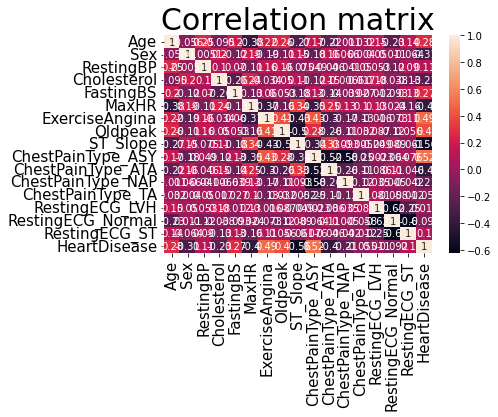

In [13]:
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.rcParams["figure.figsize"] = (15,15)
plt.title('Correlation matrix', fontsize=30)
plt.tick_params(axis='both', labelsize=15)
plt.show()

## Train

In [14]:
def reduced_attributes(df, drop_list):
    reduced_df = df.drop(drop_list, axis=1)
    y = reduced_df['HeartDisease']
    X = reduced_df.drop(['HeartDisease'], axis=1)
    return X, y



In [15]:
from sklearn.pipeline import make_pipeline

def train_model(X, y, model, iteration_cnt=10, train_ratio=0.8):
    train_scores = []
    test_scores = []
    accuracy_scores = []
    for i in range(iteration_cnt):
        X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, train_size=train_ratio, test_size=1-train_ratio)
        #pipe = make_pipeline(ct, model)
        #pipe.fit(X_train, y_train)
        model.fit(X_train, y_train)
        train_score = model.score(X_train, y_train)
        test_score = model.score(X_test, y_test)
        train_scores.append(train_score)
        test_scores.append(test_score)

        #predictions = model.predict(X_test)
        #accuracy_score = sklearn.metrics.accuracy_score(y_test, predictions)
        #accuracy_scores.append(accuracy_score)

    return np.mean(train_scores), np.std(train_scores), np.mean(test_scores), np.std(test_scores), st.sem(train_scores), st.sem(test_scores)


In [16]:
best_result = []

## Decision tree

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [18]:

#drop_list = ['RestingBP', 'RestingECG']
#drop_list = ['RestingBP']
drop_list = []
X, y = reduced_attributes(df, drop_list)
clf = DecisionTreeClassifier(max_depth=4)
train_mean, train_std, test_mean, test_std, train_sem, test_sem = train_model(X, y, clf, iteration_cnt=100, train_ratio=0.8)
print('train mean: ', train_mean)
print('train std: ', train_std)
print('test mean: ',  test_mean)
print('test std: ', test_std)
interval = st.t.interval(alpha=0.95, df=100, loc=test_mean, scale=test_sem)
print('95% interval: ', interval)
print((interval[1]-interval[0])/2)

best_result.append(test_mean)

train mean:  0.8798092643051771
train std:  0.006515566978916384
test mean:  0.83625
test std:  0.026184769072496363
95% interval:  (0.8310288450266186, 0.8414711549733815)
0.005221154973381492


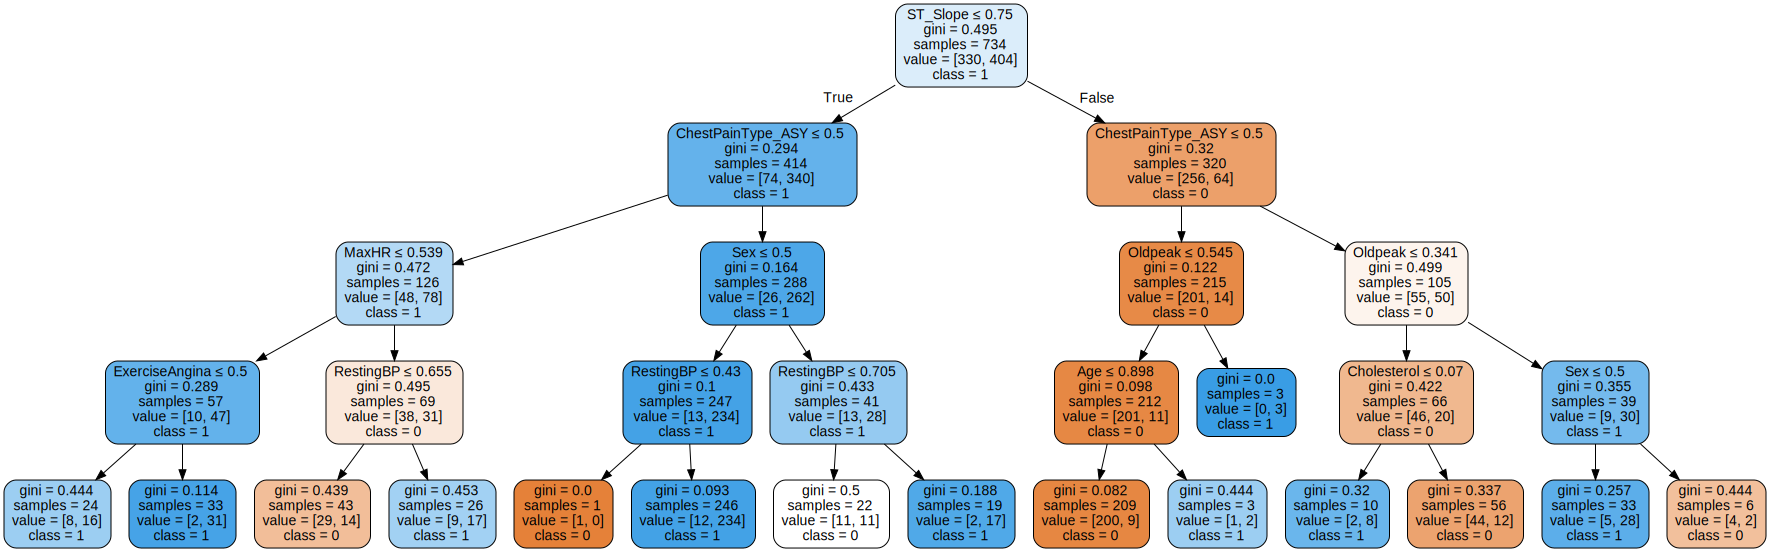

In [19]:
import graphviz

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, train_size=0.8, test_size=1-0.8)
#pipe = make_pipeline(ct, model)
#pipe.fit(X_train, y_train)
clf.fit(X_train, y_train)

dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris")
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=X_train.columns,  
                      class_names=[str(0), str(1)],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [20]:
clf = DecisionTreeClassifier(max_depth=10)
clf.fit(X_train, y_train)
print("Feature Importnaces:", clf.feature_importances_)

Feature Importnaces: [0.04464004 0.03682673 0.06445019 0.07353325 0.0095744  0.09986353
 0.01060674 0.07971193 0.41571977 0.11180676 0.00873682 0.00935533
 0.         0.01143225 0.00561485 0.01812743]


In [21]:
def model_importance(X, y, model, iteration_cnt=10, train_ratio=0.8):
    importance_score = np.zeros(len(X.columns))
    for i in range(iteration_cnt):
        X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, train_size=train_ratio, test_size=1-train_ratio)
        model.fit(X_train, y_train)
        importance_score = np.add(importance_score, model.feature_importances_)

    return importance_score/iteration_cnt

importance_average = model_importance(X, y, clf, 20, 0.8)
importance_average_with_label = sorted(list(zip(importance_average, df.columns)))
for i in range(len(df.columns)-1):
    print(importance_average_with_label[i])

(0.0024677408757671155, 'ChestPainType_TA')
(0.0030745020431743623, 'ChestPainType_ATA')
(0.005165123709087867, 'ChestPainType_NAP')
(0.006824043081695133, 'RestingECG_ST')
(0.007046678564674826, 'RestingECG_Normal')
(0.012114523211733303, 'RestingECG_LVH')
(0.017577626596474227, 'ExerciseAngina')
(0.021790591324455842, 'FastingBS')
(0.030185717030086646, 'Sex')
(0.060832201865461955, 'Age')
(0.06327238348655068, 'RestingBP')
(0.06870768326411812, 'Oldpeak')
(0.07646011444270055, 'ChestPainType_ASY')
(0.102664711729756, 'Cholesterol')
(0.10512090469698938, 'MaxHR')
(0.416695454077274, 'ST_Slope')


Max Depth = 7:
  Nincs Kidobás:
    Átlag: 0.8242, 0.8172282608695649, 0.8132608695652175, 0.8174456521739133
  Kidobás:
    Átlag: 0.8227717391304351, 0.8184239130434786, 0.8220108695652175, 0.8202173913043481

## Logistic regression

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
X, y = reduced_attributes(df, drop_list)
#lr = LogisticRegression(solver='liblinear', random_state=0, max_iter=1000)
lr = LogisticRegression(solver='lbfgs', random_state=0, max_iter=970)
train_mean, train_std, test_mean, test_std, train_sem, test_sem = train_model(X, y, lr, iteration_cnt=100, train_ratio=0.7)
print('train mean: ', train_mean)
print('train std: ', train_std)
print('test mean: ',  test_mean)
print('test std: ', test_std)
interval = st.t.interval(alpha=0.95, df=100, loc=test_mean, scale=test_sem)
print('95% interval: ', interval)
print((interval[1]-interval[0])/2)

best_result.append(test_mean)

train mean:  0.8536292834890967
train std:  0.009503995907972988
test mean:  0.8420289855072463
test std:  0.01915155838609059
95% interval:  (0.838210229113455, 0.8458477419010375)
0.003818756393791256


## Naive Bayes

In [24]:
from sklearn.naive_bayes import GaussianNB

In [25]:
X, y = reduced_attributes(df, drop_list)
nb = GaussianNB(priors=[0.45, 0.55])
train_mean, train_std, test_mean, test_std, train_sem, test_sem = train_model(X, y, nb, iteration_cnt=1000, train_ratio=0.8)
print('train mean: ', train_mean)
print('train std: ', train_std)
print('test mean: ',  test_mean)
print('test std: ', test_std)
interval = st.t.interval(alpha=0.95, df=100, loc=test_mean, scale=test_sem)
print('95% interval: ', interval)
print((interval[1]-interval[0])/2)

best_result.append(test_mean)

train mean:  0.8407493188010899
train std:  0.006347355737354049
test mean:  0.8337771739130435
test std:  0.02436987973946667
95% interval:  (0.8322474745877706, 0.8353068732383164)
0.0015296993252729152


##Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
X, y = reduced_attributes(df, drop_list)
rf = RandomForestClassifier(n_estimators=20, max_depth = 5)
train_mean, train_std, test_mean, test_std, train_sem, test_sem = train_model(X, y, rf, iteration_cnt=100, train_ratio=0.8)
print('train mean: ', train_mean)
print('train std: ', train_std)
print('test mean: ',  test_mean)
print('test std: ', test_std)
interval = st.t.interval(alpha=0.95, df=100, loc=test_mean, scale=test_sem)
print('95% interval: ', interval)
print((interval[1]-interval[0])/2)

best_result.append(test_mean)

train mean:  0.9057765667574933
train std:  0.006345674068732729
test mean:  0.8691847826086956
test std:  0.023866741240251284
95% interval:  (0.8644258345965921, 0.8739437306207991)
0.0047589480121035255


## AdaBoost

In [28]:
from sklearn.ensemble import AdaBoostClassifier

In [29]:
X, y = reduced_attributes(df, drop_list)
ab = AdaBoostClassifier(n_estimators=400, learning_rate=0.02, random_state=0) #AdaBoostClassifier(n_estimators=500, learning_rate=0.1, random_state=0)
train_mean, train_std, test_mean, test_std, train_sem, test_sem = train_model(X, y, ab, iteration_cnt=10, train_ratio=0.8)
print('train mean: ', train_mean)
print('train std: ', train_std)
print('test mean: ',  test_mean)
print('test std: ', test_std)
interval = st.t.interval(alpha=0.95, df=10, loc=test_mean, scale=test_sem)
print('95% interval: ', interval)
print((interval[1]-interval[0])/2)

best_result.append(test_mean)

train mean:  0.8708446866485013
train std:  0.008612251024130308
test mean:  0.8592391304347826
test std:  0.024720794381617717
95% interval:  (0.8408786762970762, 0.877599584572489)
0.018360454137706372


## CatBoost

In [30]:
!pip install --quiet catboost

In [53]:
from catboost import CatBoostClassifier

params = {
    #'iterations' : 75,
    #'learning_rate' :  0.14859853787080615,
    #'depth' : 5,
    'objective': 'CrossEntropy',
    'colsample_bylevel': 0.07461412258635804,
    'depth': 12,
    'boosting_type': 'Plain',
    'bootstrap_type': 'MVS',
    'logging_level' : 'Silent'
}
"""
params = {
    'objective': 'CrossEntropy',
    'colsample_bylevel': 0.07461412258635804,
    'depth': 4,
    'learning_rate': 0.04,
    'bootstrap_type': 'MVS',
    'logging_level' : 'Silent'
}"""
cb = CatBoostClassifier(**params)
#cb = CatBoostClassifier(iterations=46, learning_rate=0.35235, depth=3, logging_level='Silent')
train_mean, train_std, test_mean, test_std, train_sem, test_sem = train_model(X, y, cb, iteration_cnt=50, train_ratio=0.8)
print('train mean: ', train_mean)
print('train std: ', train_std)
print('test mean: ',  test_mean)
print('test std: ', test_std)
interval = st.t.interval(alpha=0.95, df=100, loc=test_mean, scale=test_sem)
print('95% interval: ', interval)
print((interval[1]-interval[0])/2)

best_result.append(test_mean)

train mean:  0.9649046321525886
train std:  0.004523160762942787
test mean:  0.877391304347826
test std:  0.0201647280440091
95% interval:  (0.8716761263311693, 0.8831064823644826)
0.0057151780166566635


## k-NN

In [32]:
from sklearn.neighbors import KNeighborsClassifier

def mydist(x, y):
    return np.sum(np.multiply(np.power((x-y),2),importance_average))
    #return np.sum(np.multiply(x-y,importance_average))

df_metric = df.copy()
for i in range(len(df.columns)-1):
  col = df.columns[i]
  df_metric[col] = df_metric[col] * importance_average[i]
  
drop_list = []
X, y = reduced_attributes(df_metric, drop_list)

knn = KNeighborsClassifier(n_neighbors=3)#, metric=mydist), metric_params={"power": 2})

train_mean, train_std, test_mean, test_std, train_sem, test_sem  = train_model(X, y, knn, iteration_cnt=100, train_ratio=0.8)
print('Avg train score: ',train_mean)
print('Avg test score: ',  test_mean)
interval = st.t.interval(alpha=0.95, df=5, loc=test_mean, scale=test_sem)
print('95% interval: ', interval)
print((interval[1]-interval[0])/2)

best_result.append(test_mean)

Avg train score:  0.9147002724795641
Avg test score:  0.8538043478260868
95% interval:  (0.8481095414136954, 0.8594991542384782)
0.0056948064123913955


## SVM

In [33]:
from sklearn.svm import SVC

svc = SVC()

X, y = reduced_attributes(df, drop_list)

train_mean, train_std, test_mean, test_std, train_sem, test_sem  = train_model(X, y, svc, iteration_cnt=100, train_ratio=0.8)
print('Avg train score: ', train_mean)
print('Avg test score: ',  test_mean)
interval = st.t.interval(alpha=0.95, df=100, loc=test_mean, scale=test_sem)
print('95% interval: ', interval)
print((interval[1]-interval[0])/2)

best_result.append(test_mean)

Avg train score:  0.8822615803814712
Avg test score:  0.8430978260869566
95% interval:  (0.837992670317213, 0.8482029818567002)
0.0051051557697435745


## DBSCAN

In [34]:
from sklearn.cluster import DBSCAN

eps = 1.4148 #5 claster
eps = 1.4154 #3 claster

dbscan = DBSCAN(eps=1.4148, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)

drop_list = []
X, y = reduced_attributes(df, drop_list)
dbscan.fit(X)

claster_cnt = np.max(dbscan.labels_)+1
print(claster_cnt)

6


In [35]:
print(importance_average_with_label)
labels_import = [importance_average_with_label[i][1] for i in range(5)]

for i in range(-1, claster_cnt):
    mask = (dbscan.labels_ == i)
    df_sub = df[mask]
    print(len(df[mask]))
    averages_lab = []
    for lab in labels_import:
      averages_lab.append(df_sub[lab].mean())
    print(averages_lab)

[(0.0024677408757671155, 'ChestPainType_TA'), (0.0030745020431743623, 'ChestPainType_ATA'), (0.005165123709087867, 'ChestPainType_NAP'), (0.006824043081695133, 'RestingECG_ST'), (0.007046678564674826, 'RestingECG_Normal'), (0.012114523211733303, 'RestingECG_LVH'), (0.017577626596474227, 'ExerciseAngina'), (0.021790591324455842, 'FastingBS'), (0.030185717030086646, 'Sex'), (0.060832201865461955, 'Age'), (0.06327238348655068, 'RestingBP'), (0.06870768326411812, 'Oldpeak'), (0.07646011444270055, 'ChestPainType_ASY'), (0.102664711729756, 'Cholesterol'), (0.10512090469698938, 'MaxHR'), (0.416695454077274, 'ST_Slope')]
0
[nan, nan, nan, nan, nan]
342
[0.06432748538011696, 0.43859649122807015, 0.49707602339181284, 0.07894736842105263, 0.783625730994152]
496
[0.0, 0.0, 0.0, 0.2217741935483871, 0.5725806451612904]
33
[0.0, 0.0, 1.0, 1.0, 0.0]
8
[1.0, 0.0, 0.0, 1.0, 0.0]
23
[0.0, 1.0, 0.0, 0.0, 0.0]
16
[1.0, 0.0, 0.0, 0.0, 0.0]


In [36]:
df_asy = df[df.ChestPainType_ASY == 1]
df_asy_disease = df_asy[df_asy.HeartDisease == 1]
tp = len(df_asy_disease)

df_asy = df[df.ChestPainType_ASY == 1]
df_asy_disease = df_asy[df_asy.HeartDisease == 0]
fp = len(df_asy_disease)

df_asy = df[df.ChestPainType_ASY == 0]
df_asy_disease = df_asy[df_asy.HeartDisease == 0]
tn = len(df_asy_disease)

df_asy = df[df.ChestPainType_ASY == 0]
df_asy_disease = df_asy[df_asy.HeartDisease == 1]
fn = len(df_asy_disease)

print('tp', tp)
print('fp', fp)
print('tn', tn)
print('fn', fn)

print((tp+tn)/(tp+tn+fp+fn))
print(tp / (tp +fn))

tp 392
fp 104
tn 306
fn 116
0.7603485838779956
0.7716535433070866


##Optuna


In [37]:
!pip install --quiet optuna

In [38]:
import optuna
import sklearn.datasets

In [39]:
import optuna
import sklearn.datasets

def objective(trial):
    global X, y
    
    n_estimators = trial.suggest_int('n_estimators', 21, 40)
    max_depth = int(trial.suggest_float('max_depth', 1, 32, log=True))
    
    clf = sklearn.ensemble.RandomForestClassifier(
        n_estimators=n_estimators, max_depth=max_depth)
    
    return sklearn.model_selection.cross_val_score(
        clf, X, y, n_jobs=-1, cv=5).mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

trial = study.best_trial

print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2021-12-04 16:31:53,763] A new study created in memory with name: no-name-10eb1528-e333-4002-8ddb-f1b61319beb6
[I 2021-12-04 16:31:55,462] Trial 0 finished with value: 0.8354478498455691 and parameters: {'n_estimators': 35, 'max_depth': 10.495479135791484}. Best is trial 0 with value: 0.8354478498455691.
[I 2021-12-04 16:31:55,700] Trial 1 finished with value: 0.8451651223568544 and parameters: {'n_estimators': 27, 'max_depth': 1.2455428789498029}. Best is trial 1 with value: 0.8451651223568544.
[I 2021-12-04 16:31:55,945] Trial 2 finished with value: 0.8158113566167735 and parameters: {'n_estimators': 27, 'max_depth': 2.3315665488553474}. Best is trial 1 with value: 0.8451651223568544.
[I 2021-12-04 16:31:56,193] Trial 3 finished with value: 0.8332501781895937 and parameters: {'n_estimators': 27, 'max_depth': 4.134601639116184}. Best is trial 1 with value: 0.8451651223568544.
[I 2021-12-04 16:31:56,495] Trial 4 finished with value: 0.8234735091470657 and parameters: {'n_estimators'

Accuracy: 0.8484913281064387
Best hyperparameters: {'n_estimators': 22, 'max_depth': 2.1704150679500733}


In [40]:

def objective(trial):
    global X, y
    
    max_depth = int(trial.suggest_float('max_depth', 1, 32, log=True))
    criterion_name = trial.suggest_categorical('criterion', ['gini', 'entropy'])

    
    clf = DecisionTreeClassifier(
        max_depth=max_depth, criterion=criterion_name)
    
    return sklearn.model_selection.cross_val_score(
        clf, X, y, n_jobs=-1, cv=5).mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

trial = study.best_trial

print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))
#optimizer = trial.suggest_categorical("optimizer", ["MomentumSGD", "Adam"])

[I 2021-12-04 16:32:20,638] A new study created in memory with name: no-name-ab38fdb3-a024-4b50-b37c-4f3488df180b
[I 2021-12-04 16:32:20,694] Trial 0 finished with value: 0.7700641482537419 and parameters: {'max_depth': 7.235372484920838, 'criterion': 'entropy'}. Best is trial 0 with value: 0.7700641482537419.
[I 2021-12-04 16:32:20,744] Trial 1 finished with value: 0.7951235447849846 and parameters: {'max_depth': 4.309462736568204, 'criterion': 'gini'}. Best is trial 1 with value: 0.7951235447849846.
[I 2021-12-04 16:32:20,792] Trial 2 finished with value: 0.7733368971252079 and parameters: {'max_depth': 2.868304914906082, 'criterion': 'entropy'}. Best is trial 1 with value: 0.7951235447849846.
[I 2021-12-04 16:32:20,839] Trial 3 finished with value: 0.7733368971252079 and parameters: {'max_depth': 2.0668135744312526, 'criterion': 'gini'}. Best is trial 1 with value: 0.7951235447849846.
[I 2021-12-04 16:32:20,885] Trial 4 finished with value: 0.815775718698028 and parameters: {'max_de

Accuracy: 0.815775718698028
Best hyperparameters: {'max_depth': 3.441685074114751, 'criterion': 'gini'}


In [41]:
#https://scikit-learn.org/stable/modules/compose.html#column-transformer
#

In [42]:
import optuna
import sklearn.datasets

def objective(trial):
    global X, y
    
    n_estimators = trial.suggest_int('n_estimators', 200, 600)
    learning_rate = trial.suggest_float('learning_rate', 0.00001, 0.5, log=False)
    
    clf = AdaBoostClassifier(n_estimators=n_estimators, learning_rate=learning_rate, random_state=0)
    
    return sklearn.model_selection.cross_val_score(
        clf, X, y, n_jobs=-1, cv=5).mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

trial = study.best_trial

print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2021-12-04 16:32:26,039] A new study created in memory with name: no-name-f45dd236-b5aa-45da-89f3-e61272c65ab0
[I 2021-12-04 16:32:30,221] Trial 0 finished with value: 0.8126098835827987 and parameters: {'n_estimators': 491, 'learning_rate': 0.2761166706832506}. Best is trial 0 with value: 0.8126098835827987.
[I 2021-12-04 16:32:33,442] Trial 1 finished with value: 0.8137027797576621 and parameters: {'n_estimators': 383, 'learning_rate': 0.429469250542589}. Best is trial 1 with value: 0.8137027797576621.
[I 2021-12-04 16:32:35,790] Trial 2 finished with value: 0.8125920646234259 and parameters: {'n_estimators': 279, 'learning_rate': 0.21050046628221564}. Best is trial 1 with value: 0.8137027797576621.
[I 2021-12-04 16:32:40,530] Trial 3 finished with value: 0.8158826324542648 and parameters: {'n_estimators': 566, 'learning_rate': 0.2589126445512898}. Best is trial 3 with value: 0.8158826324542648.
[I 2021-12-04 16:32:44,503] Trial 4 finished with value: 0.8136909004514136 and parame

Accuracy: 0.8310940841054884
Best hyperparameters: {'n_estimators': 237, 'learning_rate': 0.033762865227825914}


In [43]:
encoded_df = pd.get_dummies(df, drop_first=True)
encoded_df

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,HeartDisease
0,0.244898,0.0,0.70,0.479270,0.0,0.788732,0.0,0.295455,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.428571,1.0,0.80,0.298507,0.0,0.676056,0.0,0.409091,0.5,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,0.183673,0.0,0.65,0.469320,0.0,0.267606,0.0,0.295455,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.408163,1.0,0.69,0.354892,0.0,0.338028,1.0,0.465909,0.5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.530612,0.0,0.75,0.323383,0.0,0.436620,0.0,0.295455,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.346939,0.0,0.55,0.437811,0.0,0.507042,0.0,0.431818,0.5,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
914,0.816327,0.0,0.72,0.320066,1.0,0.570423,0.0,0.681818,0.5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
915,0.591837,0.0,0.65,0.217247,0.0,0.387324,1.0,0.431818,0.5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
916,0.591837,1.0,0.65,0.391376,0.0,0.802817,0.0,0.295455,0.5,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [50]:
def objective(trial):
    global X, y
    
    iterations = trial.suggest_int('iterations', 5, 80)
    learning_rate = trial.suggest_float('learning_rate', 0.001, 0.5, log=False)
    depth = trial.suggest_int('depth', 1, 10, log=False)
    
    cb = CatBoostClassifier(iterations=iterations, learning_rate=learning_rate, depth=depth, logging_level='Silent')
    
    scores = train_model(X, y, cb, iteration_cnt=30, train_ratio=0.8)[2]
    return scores
    #return sklearn.model_selection.cross_val_score(
    #    clf, X, y, n_jobs=-1, cv=5).mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=200)

trial = study.best_trial

print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2021-12-04 17:07:44,936] A new study created in memory with name: no-name-12d1fd63-aa36-4eff-930d-433d24313f32
[I 2021-12-04 17:07:46,205] Trial 0 finished with value: 0.8668478260869564 and parameters: {'iterations': 41, 'learning_rate': 0.4844942893381481, 'depth': 2}. Best is trial 0 with value: 0.8668478260869564.
[I 2021-12-04 17:07:48,197] Trial 1 finished with value: 0.8740942028985508 and parameters: {'iterations': 72, 'learning_rate': 0.044967483680244204, 'depth': 4}. Best is trial 1 with value: 0.8740942028985508.
[I 2021-12-04 17:07:56,345] Trial 2 finished with value: 0.8739130434782608 and parameters: {'iterations': 65, 'learning_rate': 0.3075100386126316, 'depth': 9}. Best is trial 1 with value: 0.8740942028985508.
[I 2021-12-04 17:07:57,487] Trial 3 finished with value: 0.8652173913043479 and parameters: {'iterations': 40, 'learning_rate': 0.14433596278020575, 'depth': 1}. Best is trial 1 with value: 0.8740942028985508.
[I 2021-12-04 17:07:59,824] Trial 4 finished wi

Accuracy: 0.8856884057971014
Best hyperparameters: {'iterations': 75, 'learning_rate': 0.14859853787080615, 'depth': 5}


In [45]:
def objective(trial):
    global X, y
    
    iterations = trial.suggest_int('max_iter', 900, 1100, step=10)
    solver_name  = trial.suggest_categorical('solver', ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'])

    lr = LogisticRegression(solver=solver_name, random_state=0, max_iter=iterations)
    train_mean, train_std, test_mean, test_std, train_sem, test_sem = train_model(X, y, lr, iteration_cnt=100, train_ratio=0.7)
    
    scores = test_mean
    return scores

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=200)

trial = study.best_trial

print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2021-12-04 16:41:45,824] A new study created in memory with name: no-name-58cde9ef-2d55-4d92-b5f4-5391f875b3db
[I 2021-12-04 16:41:48,569] Trial 0 finished with value: 0.8477536231884056 and parameters: {'max_iter': 940, 'solver': 'newton-cg'}. Best is trial 0 with value: 0.8477536231884056.
[I 2021-12-04 16:41:51,256] Trial 1 finished with value: 0.844746376811594 and parameters: {'max_iter': 930, 'solver': 'saga'}. Best is trial 0 with value: 0.8477536231884056.
[I 2021-12-04 16:41:54,044] Trial 2 finished with value: 0.8417391304347825 and parameters: {'max_iter': 910, 'solver': 'newton-cg'}. Best is trial 0 with value: 0.8477536231884056.
[I 2021-12-04 16:41:55,307] Trial 3 finished with value: 0.8456521739130433 and parameters: {'max_iter': 1060, 'solver': 'liblinear'}. Best is trial 0 with value: 0.8477536231884056.
[I 2021-12-04 16:41:56,552] Trial 4 finished with value: 0.8411956521739128 and parameters: {'max_iter': 900, 'solver': 'liblinear'}. Best is trial 0 with value: 0

Accuracy: 0.8495652173913042
Best hyperparameters: {'max_iter': 1000, 'solver': 'sag'}


In [46]:
knn = KNeighborsClassifier(n_neighbors=5)

def objective(trial):
    global X, y
    
    n_neighbours = trial.suggest_int('n_neighbours', 3, 15, step=1)

    knn = KNeighborsClassifier(n_neighbors=n_neighbours)
    train_mean, train_std, test_mean, test_std, train_sem, test_sem = train_model(X, y, lr, iteration_cnt=100, train_ratio=0.7)
    
    scores = test_mean
    return scores

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=200)

trial = study.best_trial

print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2021-12-04 16:48:01,279] A new study created in memory with name: no-name-971fdf75-4cb9-4f20-a0db-e55cac8bfe1d
[I 2021-12-04 16:48:03,792] Trial 0 finished with value: 0.8436231884057969 and parameters: {'n_neighbours': 11}. Best is trial 0 with value: 0.8436231884057969.
[I 2021-12-04 16:48:06,268] Trial 1 finished with value: 0.8443478260869562 and parameters: {'n_neighbours': 9}. Best is trial 1 with value: 0.8443478260869562.
[I 2021-12-04 16:48:08,771] Trial 2 finished with value: 0.8465217391304346 and parameters: {'n_neighbours': 8}. Best is trial 2 with value: 0.8465217391304346.
[I 2021-12-04 16:48:11,199] Trial 3 finished with value: 0.8443840579710142 and parameters: {'n_neighbours': 9}. Best is trial 2 with value: 0.8465217391304346.
[I 2021-12-04 16:48:13,781] Trial 4 finished with value: 0.8464855072463766 and parameters: {'n_neighbours': 8}. Best is trial 2 with value: 0.8465217391304346.
[I 2021-12-04 16:48:16,317] Trial 5 finished with value: 0.8484782608695651 and 

Accuracy: 0.8487681159420287
Best hyperparameters: {'n_neighbours': 7}


# Eredmények

In [47]:
model_list = ['Decision Tree', 'Logistic Regression', 'Naive Bayes', 'Random Forest', 'AdaBoost', 'CatBoost', 'k-NN', 'SVM']
for i in range(len(model_list)):
    print(model_list[i], ' : ', best_result[i])

Decision Tree  :  0.83625
Logistic Regression  :  0.8420289855072463
Naive Bayes  :  0.8337771739130435
Random Forest  :  0.8691847826086956
AdaBoost  :  0.8592391304347826
CatBoost  :  0.8771739130434782
k-NN  :  0.8538043478260868
SVM  :  0.8430978260869566


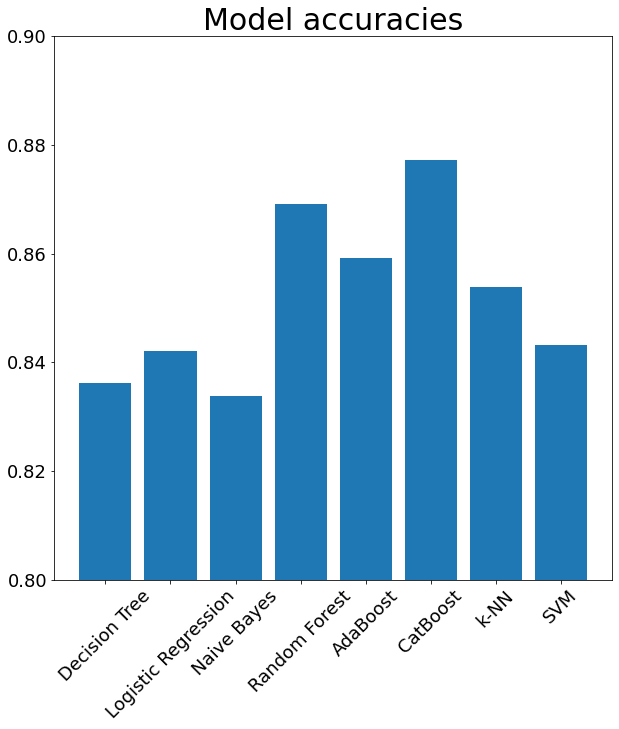

In [48]:
plt.figure(figsize=(10, 10))
plt.title('Model accuracies', fontsize=30)
plt.bar(model_list, best_result)
plt.ylim(0.8, 0.9)
plt.xticks(rotation = 45, fontsize=18)
plt.yticks(fontsize = 18)
plt.show()